In [21]:
import sys
print(sys.executable)


C:\Users\kumku\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [22]:
import sys
!{sys.executable} -m pip install seaborn


In [23]:
import seaborn as sns
print("Seaborn version:", sns.__version__)


Seaborn version: 0.13.2


In [24]:
import sys
!{sys.executable} -m pip install scikit-learn


In [25]:
import sys
!{sys.executable} -m pip install imbalanced-learn


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_recall_fscore_support,confusion_matrix


In [27]:
# path of CSV file
csv_file = r"C:\Users\kumku\Downloads\machine project\breast-cancer.csv"

# Read CSV into DataFrame
df = pd.read_csv(csv_file)

# Display first 10 rows
print(df.head(10))


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [28]:
# Display dataset info
print("\nDataset Info:\n")
print(df.info())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_

In [29]:
# Data Cleaning (Checking for missing values)
print("Missing values:\n", df.isnull().sum())

# Check class distribution
print("\nClass Distribution:\n", df['diagnosis'].value_counts())


Missing values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Class Distribution:
 diagnosis
B    357
M

C:\Users\kumku\AppData\Local\Temp\ipykernel_8772\2374106708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diagnosis'], palette='coolwarm')


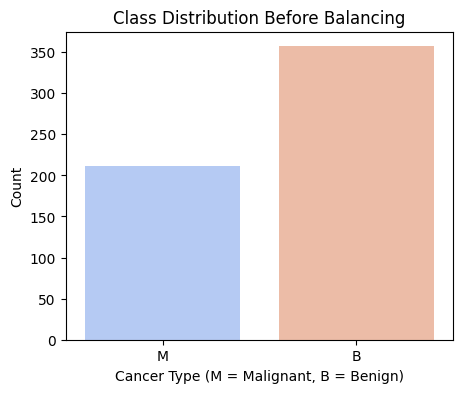

In [30]:
# Class Distribution Before Balancing
plt.figure(figsize=(5, 4))
sns.countplot(x=df['diagnosis'], palette='coolwarm')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Cancer Type (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()


C:\Users\kumku\AppData\Local\Temp\ipykernel_8772\2116292379.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='coolwarm')


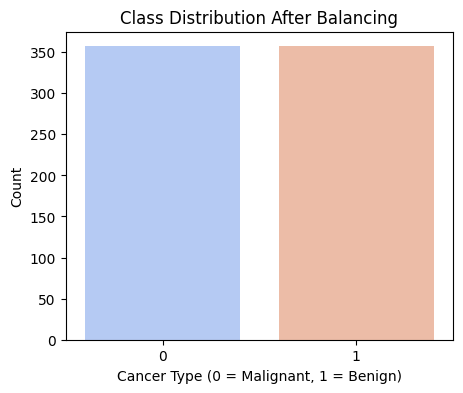

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


# Encode the 'diagnosis' column (M -> 0, B -> 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['diagnosis'])  # M -> 0, B -> 1

# Drop 'id' and 'diagnosis' to keep only numerical features
X_selected = df.drop(columns=['id', 'diagnosis'])

# Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_selected_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Class Distribution After Balancing
plt.figure(figsize=(5, 4))
sns.countplot(x=y_resampled, palette='coolwarm')
plt.title('Class Distribution After Balancing')
plt.xlabel('Cancer Type (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.show()



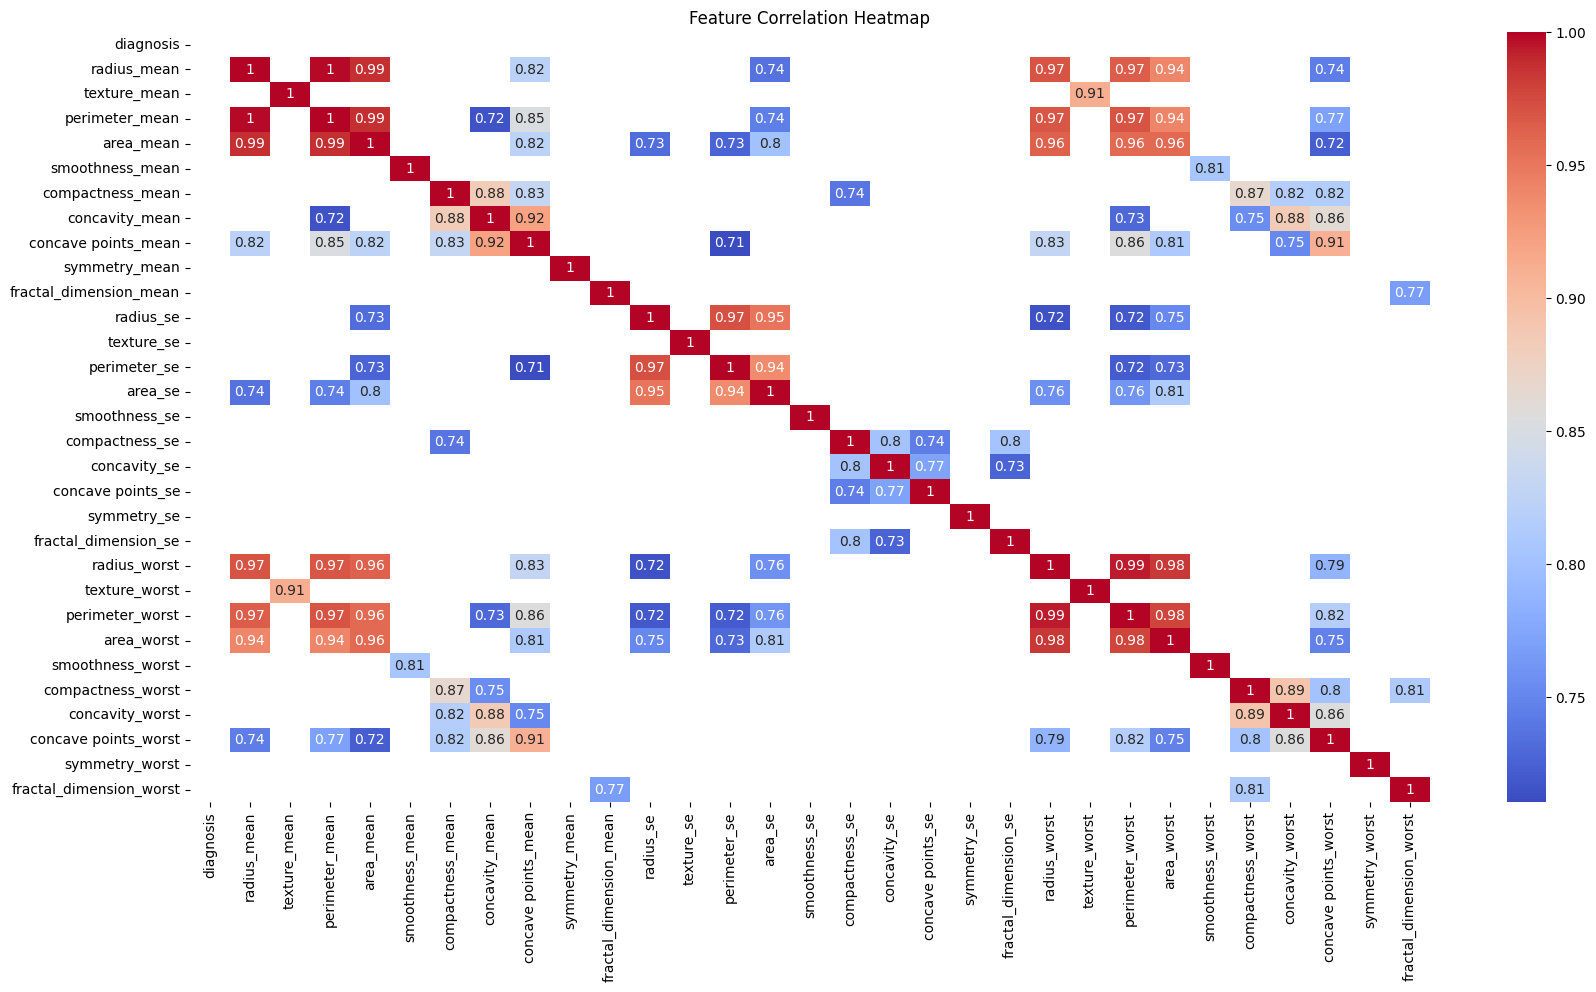

In [43]:
# Drop 'id' column and encode 'diagnosis' as numeric (M = 0, B = 1)
df_numeric = df.drop(columns=['id']).copy()
df_numeric['diagnosis'] = df_numeric['diagnosis'].map({'M': 0, 'B': 1})

# Compute correlation matrix
corr_matrix = df_numeric.corr(method="pearson")

# Create mask for correlations ≤ 0.7
mask = abs(corr_matrix) <= 0.7

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
plt.title("Feature Correlation Heatmap")
plt.show()


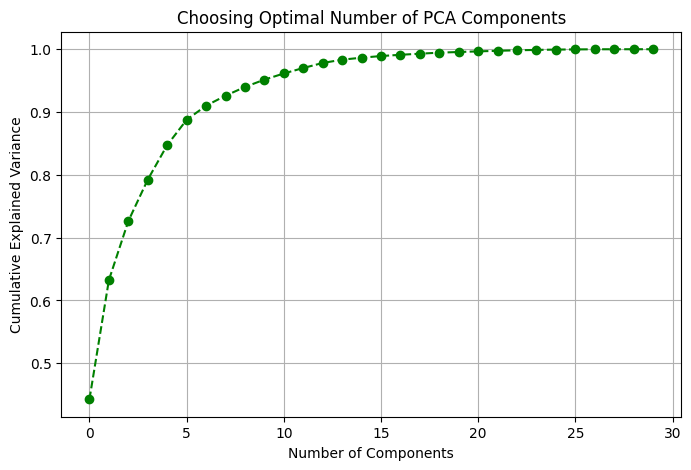

Optimal number of components: 10


In [44]:
# Encode 'diagnosis' as numeric (M = 0, B = 1)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  # M -> 0, B -> 1

# Drop 'id' column and separate features and target
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='g')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing Optimal Number of PCA Components")
plt.grid()
plt.show()

# Reduce to optimal components (keeping 95% variance)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95)+1
print(f"Optimal number of components: {n_components}")

pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)

# Visualize if n_components is 2
if n_components == 2:
    plt.scatter(...)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap="magma", alpha=0.7)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Visualization (2 Components)")
    plt.colorbar(scatter, label="Diagnosis (0 = Malignant, 1 = Benign)")
    plt.show()


In [45]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,-0.096515,-0.068850,-0.084519,-0.175256,-0.151020,0.201503,-0.252585,0.033914,-0.045648,0.047169
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,0.077327,0.094578,0.217718,0.011290,-0.170510,0.041129,0.181270,-0.032624,0.005687,0.001868
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,-0.311067,0.060309,0.074291,0.102762,0.171158,-0.004735,0.049569,-0.047026,-0.003146,-0.000751
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,-0.434193,0.203266,0.124105,0.153430,0.077496,0.275225,0.183462,-0.042484,0.069295,0.019937
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,0.116545,0.017650,-0.139454,-0.005332,0.003062,-0.039254,0.032168,0.034786,-0.005038,-0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,-0.006888,0.067000,-0.088590,0.107898,0.219520,0.122900,0.159198,-0.009853,-0.007119,0.001415
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,0.009802,-0.019563,0.055405,0.086135,0.001197,-0.065889,-0.068512,0.023575,0.027486,0.010419
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,0.036592,-0.063352,0.200312,-0.044819,0.002429,-0.007095,-0.023691,0.002578,-0.006706,-0.003770
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,-0.140648,0.042478,-0.168820,-0.195969,0.377830,0.198192,-0.027409,0.068086,0.084163,0.023783


In [46]:
#pca
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)
model=SVC(kernel='linear')
model.fit(X_train,y_train)



,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Accuracy Score :  97.0 %


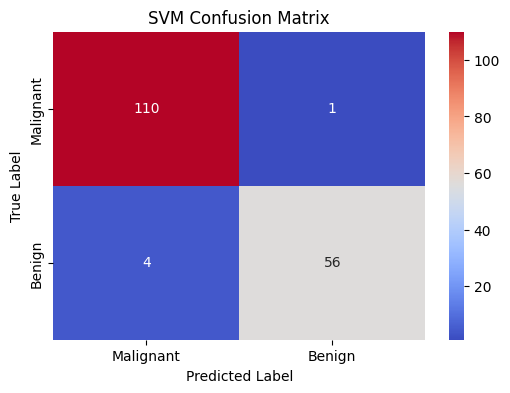

In [47]:
y_predict=model.predict(X_test)
withfs=round(accuracy_score(y_predict,y_test),2)
print("Accuracy Score : ",withfs*100,"%")
cm = confusion_matrix(y_test, y_predict)

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()



SVM Model trained successfully!
Accuracy Score :  94.0 %


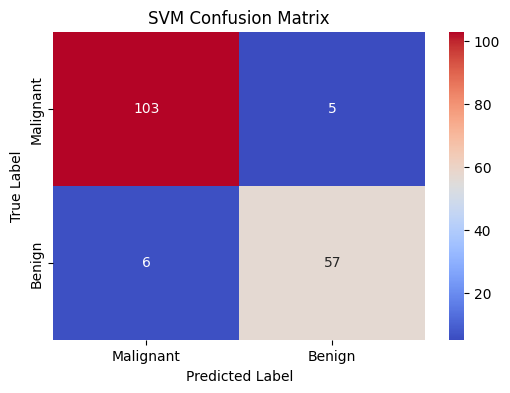

In [48]:
# Encode 'diagnosis' as numeric (M = 0, B = 1)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])  # M -> 0, B -> 1

# Select correct feature columns
X1 = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']]
y = df['diagnosis']

# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=42)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train1, y_train1)

print("SVM Model trained successfully!")
 
y_predict1=model.predict(X_test1)
without=round(accuracy_score(y_predict1,y_test1),2)
print("Accuracy Score : ",without*100,"%")
cm = confusion_matrix(y_test1, y_predict1)

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()


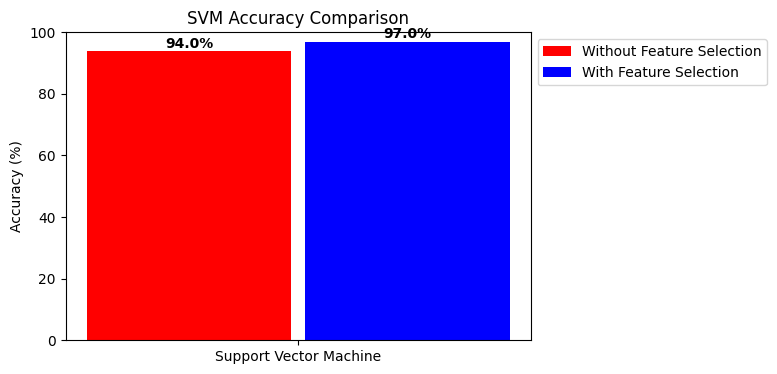

In [49]:
# Example accuracy values
without_fs = without  # Accuracy without feature selection
with_fs = withfs  # Accuracy with feature selection

# Labels
models = ["Support Vector Machine"]

# Bar positions
x = np.arange(len(models))
width = 0.15  # Bar width
gap = 0.01  # Gap between bars

# Create bar chart
plt.figure(figsize=(6, 4))
bars1 = plt.bar(x - (width + gap) / 2, without_fs * 100, width, label="Without Feature Selection", color="red")
bars2 = plt.bar(x + (width + gap) / 2, with_fs * 100, width, label="With Feature Selection", color="blue")

# Add percentage labels on top of the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', fontsize=10, fontweight='bold')

# Labels & Title
plt.xticks(x, models)
plt.ylabel("Accuracy (%)")  # Added percentage sign
plt.ylim(0, 100)  # Set limits to 100% scale
plt.title("SVM Accuracy Comparison")

# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()



🔹 Classification Report (With Feature Selection):
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       113
           1       0.96      0.98      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215


🔹 Classification Report (Without Feature Selection - Using All Features):
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       113
           1       0.96      0.98      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215


✅ Accuracy With Feature Selection: 97.21%
✅ Accuracy Without Feature Selection (All Features): 97.21%


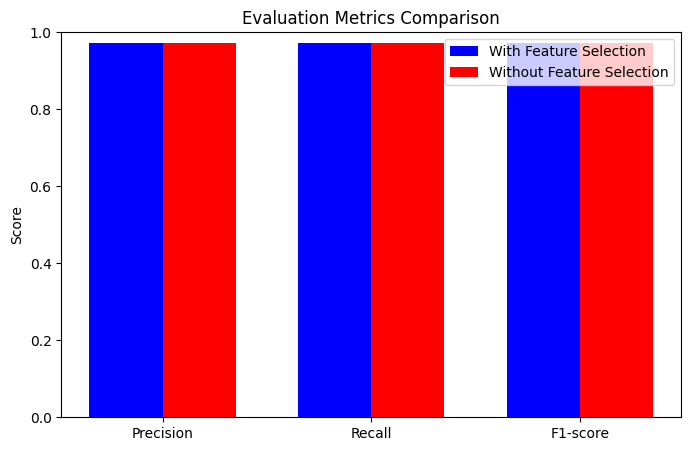

In [ ]:
# Train-Test Split (70% train, 30% test)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected_resampled, y_resampled, test_size=0.3, random_state=42)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_selected_resampled, y_resampled, test_size=0.3, random_state=42)

# Standardization (Scaling the features)
scaler_sel = StandardScaler()
X_train_sel = scaler_sel.fit_transform(X_train_sel)
X_test_sel = scaler_sel.transform(X_test_sel)

scaler_all = StandardScaler()
X_train_all = scaler_all.fit_transform(X_train_all)
X_test_all = scaler_all.transform(X_test_all)

# Model Training (SVM with linear kernel)
model_sel = SVC(kernel='linear')
model_all = SVC(kernel='linear')

model_sel.fit(X_train_sel, y_train_sel)
model_all.fit(X_train_all, y_train_all)

# Predictions
y_pred_sel = model_sel.predict(X_test_sel)
y_pred_all = model_all.predict(X_test_all)

# Classification Reports
print("\n🔹 Classification Report (With Feature Selection):\n", classification_report(y_test_sel, y_pred_sel))
print("\n🔹 Classification Report (Without Feature Selection - Using All Features):\n", classification_report(y_test_all, y_pred_all))

# Model Accuracies
accuracy_sel = model_sel.score(X_test_sel, y_test_sel)
accuracy_all = model_all.score(X_test_all, y_test_all)
print(f"\n✅ Accuracy With Feature Selection: {accuracy_sel * 100:.2f}%")
print(f"✅ Accuracy Without Feature Selection (All Features): {accuracy_all * 100:.2f}%")

# Model Evaluation Precision, Recall, F1-score Visualization
precision_sel, recall_sel, f1_sel, _ = precision_recall_fscore_support(y_test_sel, y_pred_sel, average='weighted')
precision_all, recall_all, f1_all, _ = precision_recall_fscore_support(y_test_all, y_pred_all, average='weighted')

metrics = ['Precision', 'Recall', 'F1-score']
values_sel = [precision_sel, recall_sel, f1_sel]
values_all = [precision_all, recall_all, f1_all]

plt.figure(figsize=(8, 5))
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, values_sel, width, label='With Feature Selection', color='blue')
plt.bar(x + width/2, values_all, width, label='Without Feature Selection', color='red')
plt.xticks(ticks=x, labels=metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Evaluation Metrics Comparison')
plt.legend()
plt.show()



🔹 Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       113
           1       0.96      0.98      0.97       102

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215


🔹 Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       113
           1       0.97      0.98      0.98       102

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215


🔹 Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       113
           1       0.95      1.00      0.98       102

    accuracy                           0.98       215
   macro a

C:\Users\kumku\AppData\Local\Temp\ipykernel_8772\3332835607.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')


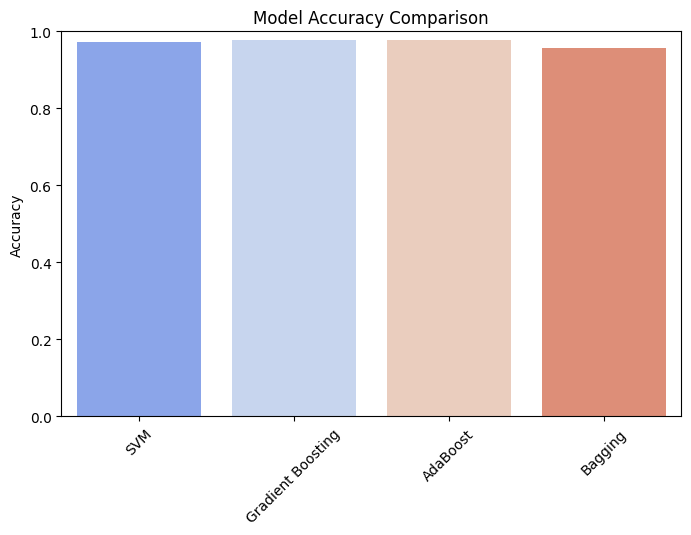

In [51]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Model Training (SVM & Ensemble Techniques)
model_svm = SVC(kernel='linear')
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_ab = AdaBoostClassifier(n_estimators=100, random_state=42)
model_bag = BaggingClassifier(n_estimators=100, random_state=42)

models = {
    "SVM": model_svm,
    "Gradient Boosting": model_gb,
    "AdaBoost": model_ab,
    "Bagging": model_bag
}

# Train Models
for name, model in models.items():
    model.fit(X_train_sel, y_train_sel)

# Predictions & Evaluation
accuracies = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test_sel)
    accuracy = model.score(X_test_sel, y_test_sel)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_sel, y_pred, average='weighted')
    
    accuracies[name] = accuracy
    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1
    
    print(f"\n🔹 Classification Report ({name}):\n", classification_report(y_test_sel, y_pred))

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='coolwarm')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()
